In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [195]:
df = pd.read_csv('MaunaLoaDailyTemps.csv')
df.head(5).T

,0,1,2,3,4
DATE,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014
MinTemp,33.0,35.0,36.0,32.0,24.0
MaxTemp,46.0,50.0,45.0,41.0,38.0
AvgTemp,40.0,43.0,41.0,37.0,31.0
Sunrise,657,657,657,658,658
Sunset,1756,1756,1757,1757,1758


In [196]:
df.tail(5)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753
1824,12/30/2018,39.0,52.0,46.0,656,1754


In [202]:
df.shape

(1825, 6)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [204]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [205]:
df[df['AvgTemp'] > 50]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
24,2014-01-25,41.0,62.0,52.0,659,1811
107,2014-04-18,43.0,60.0,52.0,602,1841
108,2014-04-19,43.0,60.0,52.0,602,1841
114,2014-04-25,43.0,59.0,51.0,558,1843
115,2014-04-26,45.0,62.0,54.0,557,1844
...,...,...,...,...,...,...
1732,2018-09-29,43.0,61.0,52.0,613,1812
1733,2018-09-30,43.0,62.0,53.0,613,1811
1734,2018-10-01,40.0,63.0,52.0,613,1811
1737,2018-10-04,43.0,58.0,51.0,614,1808


In [206]:
df.groupby([df.DATE.dt.year])['MaxTemp'].max()

DATE
2014    66.0
2015    67.0
2016    67.0
2017    66.0
2018    66.0
Name: MaxTemp, dtype: float64

<Axes: xlabel='DATE'>

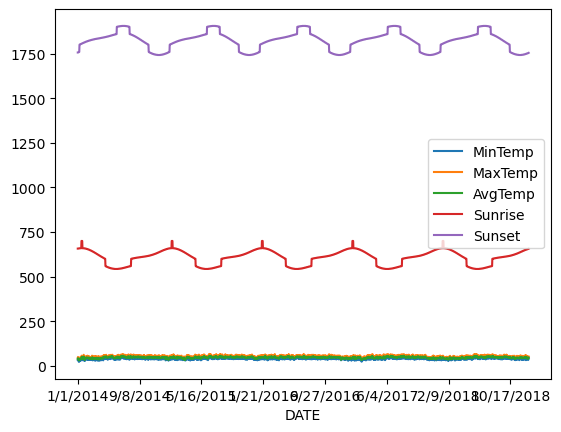

In [180]:
df.index=df['DATE'] #making month as index column
del df['DATE']
df.plot()

In [181]:
result=adfuller(df['MinTemp'].dropna())
result[1]

0.0003329067559636998

<Axes: xlabel='DATE'>

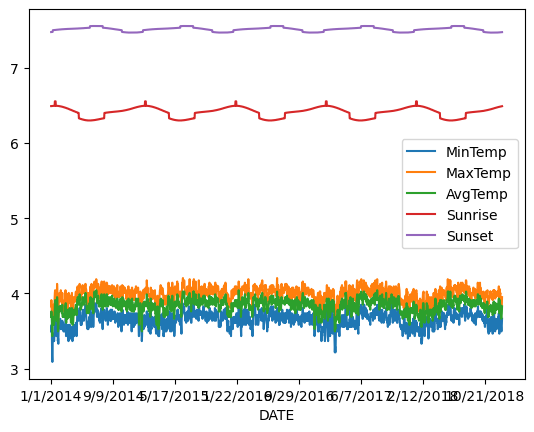

In [182]:
first_log = np.log(df)
first_log = first_log.dropna()
first_log.plot()

In [183]:
mean_log = first_log.rolling(window=30).mean()
std_log=first_log.rolling(window=30).std()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Rolling mean & Standard deviation')

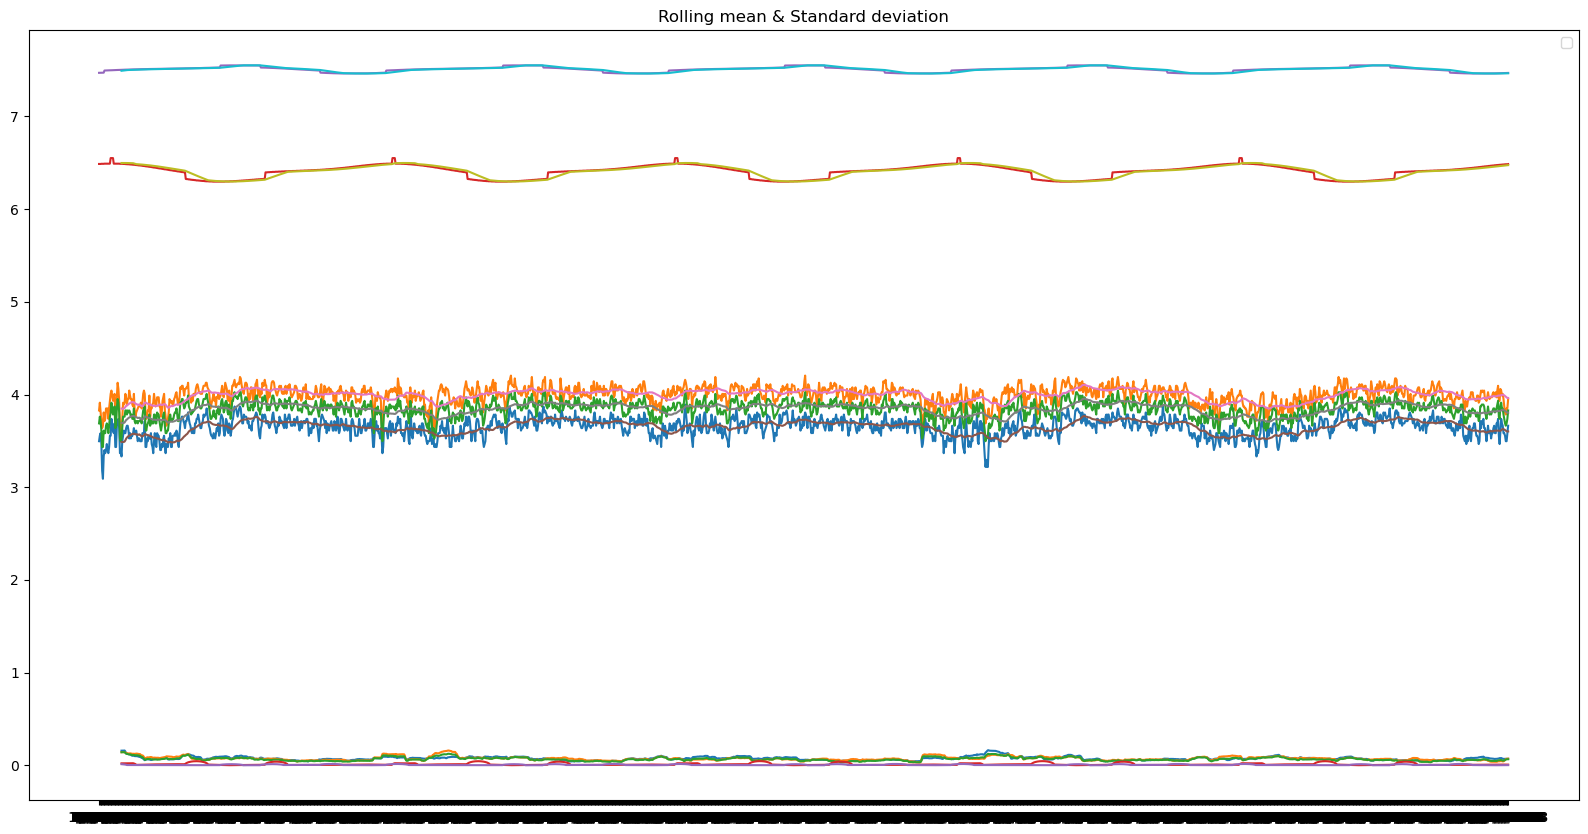

In [184]:
plt.figure(figsize=(20,10))
plt.plot(first_log)
plt.plot(mean_log)
plt.plot(std_log)
plt.legend(loc='best')
plt.title('Rolling mean & Standard deviation')

In [186]:
new_data=first_log-mean_log
new_data = new_data.dropna()

In [190]:
result=adfuller(new_data['MaxTemp'])
result[1]

8.023332531226316e-30

In [209]:
arima_model = auto_arima(df['AvgTemp'].dropna(), seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.245, Time=1.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.290, Time=1.56 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.635, Time=1.59 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.193, Time=1.70 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.625, Time=2.15 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.033, Time=2.11 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.583, Time=2.51 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8307.027, Time=2.14 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [164]:
train = first_log.iloc[:1456]['MinTemp']
test = first_log.iloc[1457:]['MinTemp']

C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

<Axes: xlabel='DATE'>

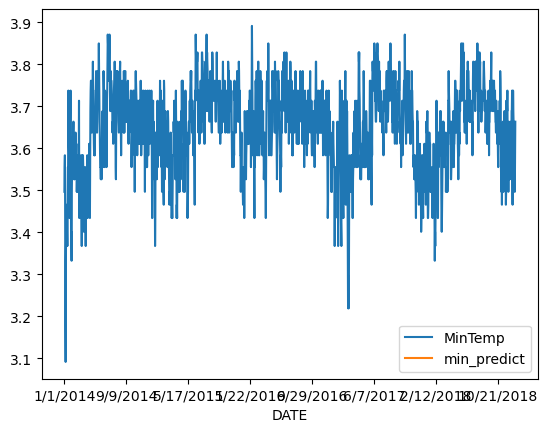

In [165]:
model=ARIMA(train, order=(3, 0, 5))
model_fit = model.fit()
model_fit.summary()

first_log['min_predict'] = model_fit.predict(start=len(train), end=len(train) + len(test)-1, dynamic=True)
first_log[['MinTemp', 'min_predict']].plot()

In [166]:
first_log

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,min_predict
DATE,,,,,,
1/1/2014,3.496508,3.828641,3.688879,6.487684,7.470794,NaN
1/2/2014,3.555348,3.912023,3.761200,6.487684,7.470794,NaN
1/3/2014,3.583519,3.806662,3.713572,6.487684,7.471363,NaN
1/4/2014,3.465736,3.713572,3.610918,6.489205,7.471363,NaN
1/5/2014,3.178054,3.637586,3.433987,6.489205,7.471932,NaN
...,...,...,...,...,...,...
12/26/2018,3.555348,3.806662,3.688879,6.483107,7.468513,NaN
12/27/2018,3.496508,3.784190,3.663562,6.484635,7.468513,NaN
12/28/2018,3.496508,3.850148,3.688879,6.484635,7.469084,NaN


Text(0.5, 1.0, 'Rolling mean & Standard deviation')

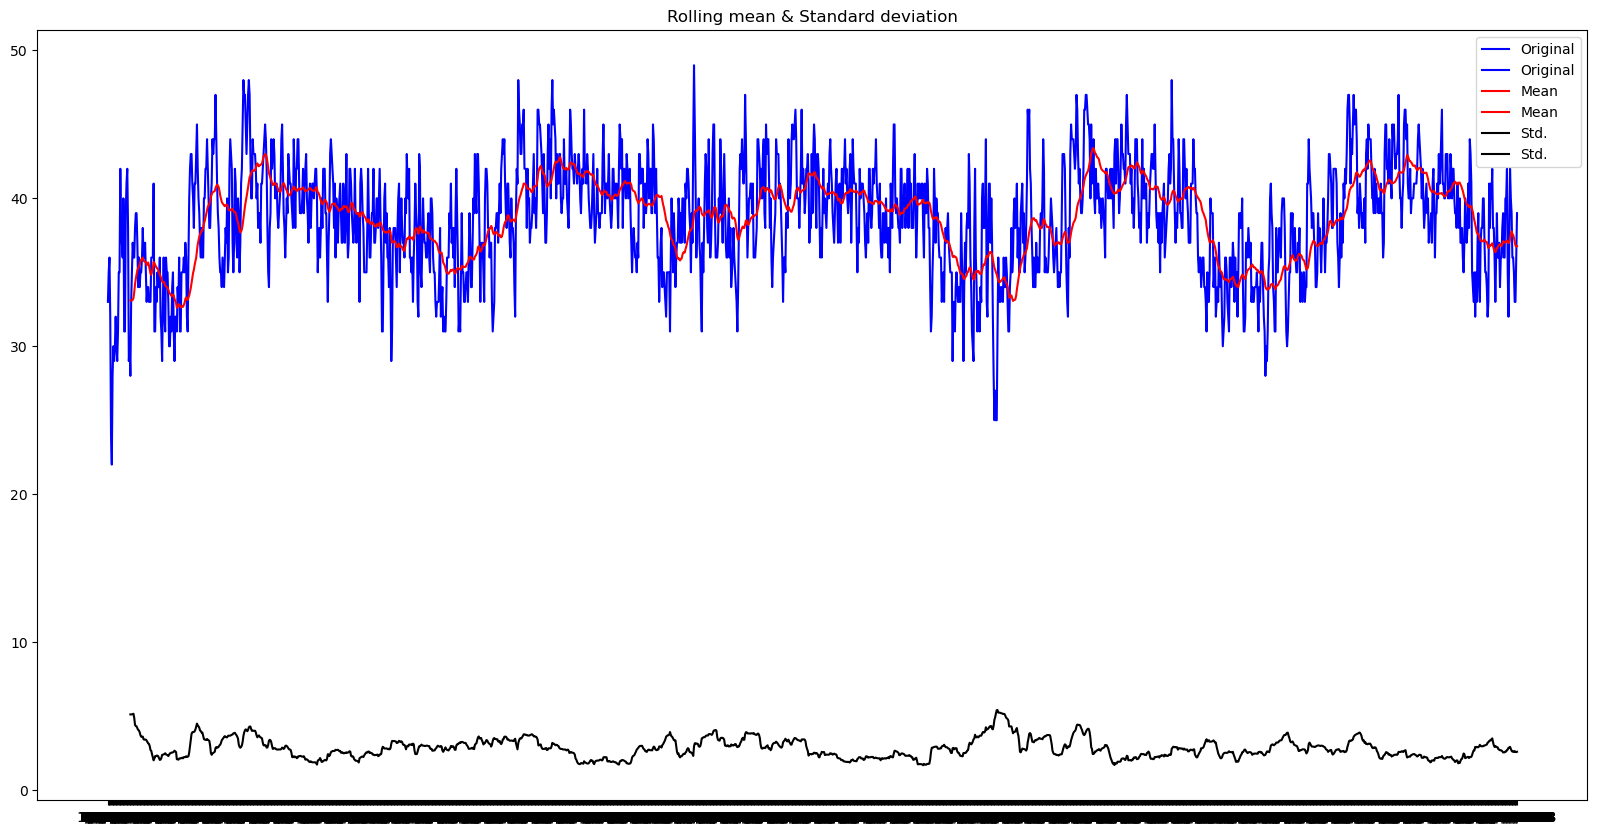

In [119]:
arima_model = auto_arima(df_min_temp['MinTemp'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8299.091, Time=1.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10031.202, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8318.044, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8957.741, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18495.914, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8311.541, Time=0.94 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8321.815, Time=0.58 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8313.189, Time=1.75 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8287.616, Time=1.63 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8281.972, Time=1.59 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=8480.138, Time=0.41 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=8261.746, Time=1.86 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=8412.991, Time=0.56 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8283.596, Time=2.05 sec
 ARIMA(1,0,5)(0,0,0)[0] interce

In [107]:
train = df_min_temp.iloc[:1456]['MinTemp']
test = df_min_temp.iloc[1457:]['MinTemp']

In [108]:
train.shape, test.shape

((1456,), (364,))

C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer

<Axes: xlabel='DATE'>

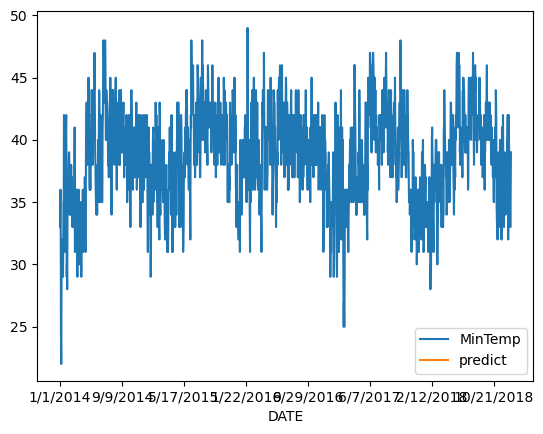

In [120]:
model=ARIMA(train, order=(1, 0, 5))
model_fit = model.fit()
model_fit.summary()

df_min_temp['predict'] = model_fit.predict(start=len(train), end=len(train) + len(test)-1, dynamic=True)
df_min_temp[['MinTemp', 'predict']].plot()

In [121]:
df_min_temp

,MinTemp,predict
DATE,,
1/1/2014,33.0,NaN
1/2/2014,35.0,NaN
1/3/2014,36.0,NaN
1/4/2014,32.0,NaN
1/5/2014,24.0,NaN
...,...,...
12/26/2018,35.0,NaN
12/27/2018,33.0,NaN
12/28/2018,33.0,NaN


In [113]:
model=SARIMAX(train, order=(3,0, 2), seasonal_order=(3, 0, 2, 6))
model = model.fit()
model.summary()

C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           MinTemp   No. Observations:                 1456
Model:             SARIMAX(3, 0, 2)x(3, 0, 2, 6)   Log Likelihood                   0.000
Date:                           Wed, 11 Dec 2024   AIC                             22.000
Time:                                   19:04:53   BIC                             80.118
Sample:                                        0   HQIC                            43.683
                                          - 1456                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9850         -0       -inf      0.000       0.985       0.985
ar.L2          0.9988      0.001    687.284      0.000       0.996       1.002
ar.L3         -0.9841   2.57e-13  -3.82e+12      0.000      -0.984      -0.984
ma.L1          0.0218      0.000     46.477      0.000       0.021       0.023
ma.L2         -0.9696      0.004   -242.614      0.000      -0.977      -0.962
ar.S.L6       -0.0864      0.001    -61.929      0.000      -0.089      -0.084
ar.S.L12       0.9763      0.002    635.625      0.000       0.973       0.979
ar.S.L18       0.1100   7.55e-05   1456.215      0.000       0.110       0.110
ma.S.L6        0.0026      0.001      2.677      0.007       0.001       0.005
ma.S.L12      -0.9877      0.005   -184.954      0.000      -0.998      -0.977
sigma2         5.4739      0.029    188.870      0.000       5.417       5.531
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='DATE'>

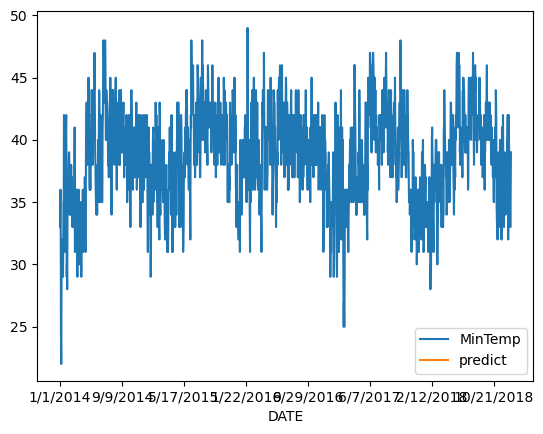

In [114]:
df_min_temp['predict'] = model.predict(start=len(train), end=len(train) + len(test)-1, dynamic=True)
df_min_temp[['MinTemp', 'predict']].plot()

C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='DATE'>

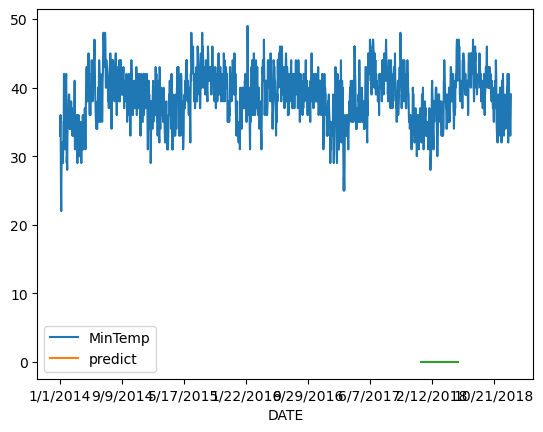

In [116]:
forecast=model.forecast(steps=150)
df_min_temp.plot()
forecast.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Rolling mean & Standard deviation')

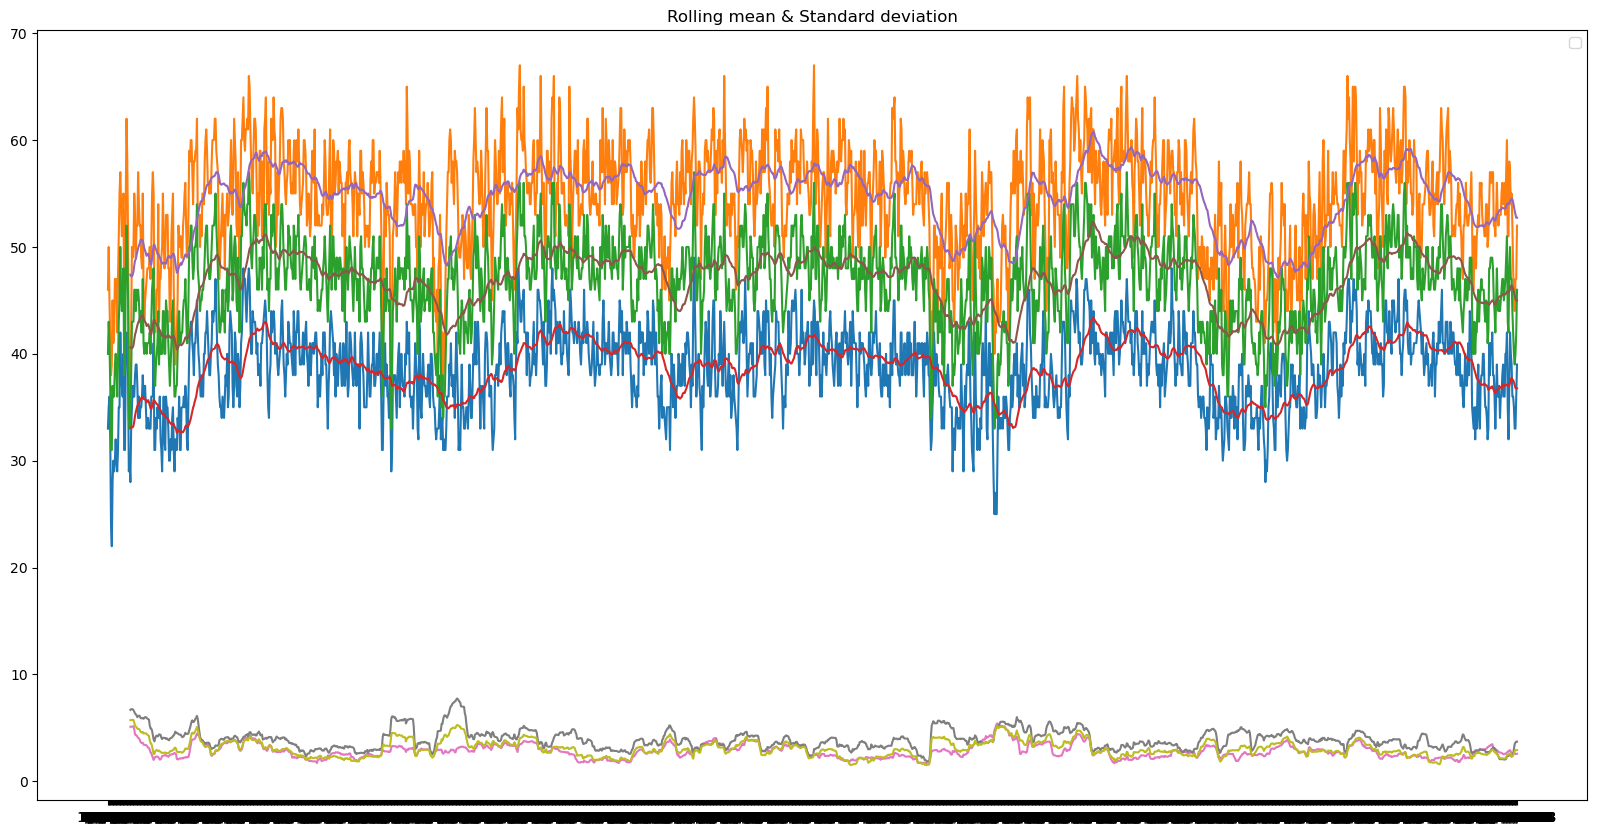

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df_temp_1)
plt.plot(mean_log)
plt.plot(std_log)
plt.legend(loc='best')
plt.title('Rolling mean & Standard deviation')

In [210]:
df_stock = pd.read_csv('stocks.csv')
df_stock.head(5)

,Date,Open,High,Low,Close
0,9/14/2018,2044.000000,2071.550049,2018.150024,2065.399902
1,9/17/2018,2070.000000,2077.800049,2054.550049,2074.149902
2,9/18/2018,2073.000000,2078.800049,2057.600098,2070.750000
3,9/19/2018,2071.899902,2089.000000,2066.850098,2077.899902
4,9/21/2018,2077.000000,2121.000000,2050.149902,2103.149902


In [213]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1235 non-null   datetime64[ns]
 1   Open    1235 non-null   float64       
 2   High    1235 non-null   float64       
 3   Low     1235 non-null   float64       
 4   Close   1235 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.4 KB


In [212]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

<Axes: xlabel='Date'>

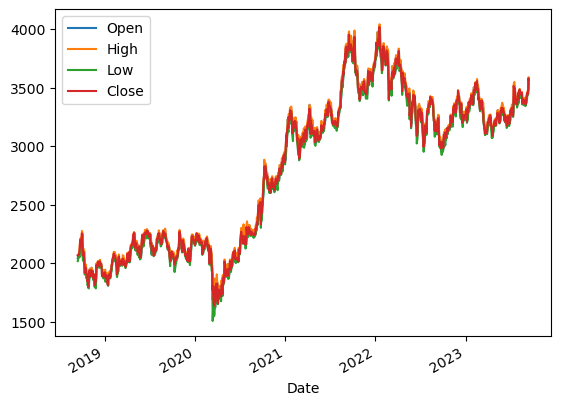

In [215]:
df_stock.index=df_stock['Date'] #making month as index column
del df_stock['Date']
df_stock.plot()

Index(['DATE', 'MinTemp', 'MaxTemp', 'AvgTemp', 'Sunrise', 'Sunset'], dtype='object')